<p>Yiwei Yu id:5708729817</p>

In [247]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sn
import matplotlib.pyplot as plt
import math 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
import os

In [248]:
headers = []
with open("../data/crime/communities.names") as f:
    for i in f:
        if("@attribute" in i):
              headers.append(i.split(" ")[1])

In [249]:
#java_home = os.environ.get('JAVA_HOME', None)
#java_home

<h3>1.The LASSO and Boosting for Regression</h3>

In [250]:
data = pd.read_csv("../data/crime/communities.csv",names = headers,na_values = '?')

In [251]:
data

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9.0,80070.0,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,25,17.0,72600.0,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


In [252]:
data = data.drop(['state','county','community','communityname','fold'],axis = 1)
data

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


In [253]:
training = data.iloc[:1495]
training

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.02,0.14,0.22,NaN,NaN,NaN,NaN,0.00,NaN,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.07,0.40,0.14,0.07,0.05,0.85,0.5,0.61,0.19,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,NaN,NaN,NaN,NaN,0.00,NaN,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.15,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [254]:
test = data.iloc[1495:]
test

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
1495,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.01,0.23,0.73,NaN,NaN,NaN,NaN,0.00,NaN,0.12
1496,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.01,0.18,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.11
1497,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.01,0.18,0.00,NaN,NaN,NaN,NaN,0.00,NaN,0.12
1498,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.06,0.13,0.16,NaN,NaN,NaN,NaN,0.00,NaN,0.06
1499,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.03,0.23,0.06,NaN,NaN,NaN,NaN,0.00,NaN,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


<h4>1.(b)
The data set has missing values. Use a data imputation technique to deal with
the missing values in the data set. The data description mentions some features
are nonpredictive. Ignore those features.</h4>

In [255]:
imp_mean = SimpleImputer(missing_values = np.nan,strategy = 'mean')
imp_mean.fit(training)

SimpleImputer()

In [256]:
all_data = pd.DataFrame(imp_mean.transform(data),columns = data.columns)

In [257]:
new_training = pd.DataFrame(imp_mean.transform(training),columns = data.columns)
new_training

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.02,0.14,0.22,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.07,0.40,0.14,0.070000,0.050000,0.850000,0.500000,0.61,0.190000,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.15,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03


In [258]:
new_test = pd.DataFrame(imp_mean.transform(test),columns = data.columns)
new_test

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.01,0.23,0.73,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.12
1,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.01,0.18,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.11
2,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.01,0.18,0.00,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.12
3,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.06,0.13,0.16,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.06
4,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.03,0.23,0.06,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.09
495,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.45
496,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91,0.280000,0.23
497,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22,0.180000,0.19


<h4>1.(c)Plot a correlation matrix for the features in the data set.</h4>

In [259]:
#all_data

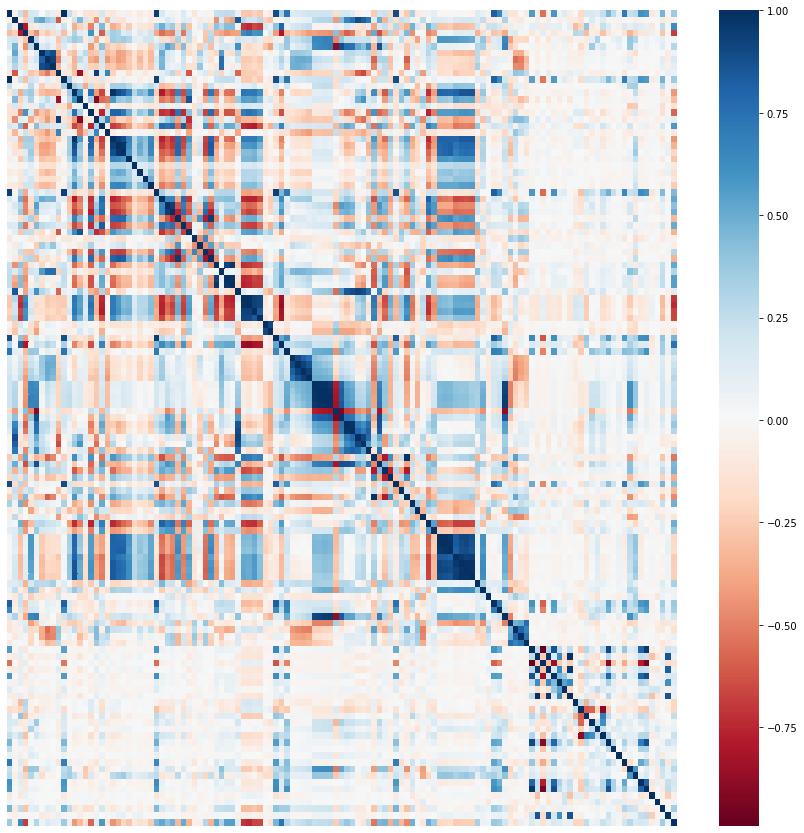

In [260]:
plt.figure(figsize=(15,15))
sn.heatmap(all_data.corr(), xticklabels=False, yticklabels=False,cmap='RdBu')
plt.show()

<h4>1.(d)Calculate the Coefficient of Variation</h4>

In [261]:
#all_data

In [262]:
c_v = {}
c_v2 = {}
for i in all_data.columns:
    c_v[i] = [all_data[i].std()/all_data[i].mean()]
    c_v2[i] = all_data[i].std()/all_data[i].mean()
pd.DataFrame(data = c_v)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,2.203503,0.353298,1.41092,0.323782,1.359162,1.614278,0.36584,0.290693,0.495161,0.423442,...,1.678031,0.872187,1.416673,0.523655,0.701202,0.120471,0.360299,2.555266,0.343782,0.979015


<h4>1.e Pick√128 features with highest CV, and make scatter plots and box plots for
them. Can you draw conclusions about significance of those features, just by the
scatter plots?</h4>
<p> It's hard to tell the significance of those features by just the scatter plots because there are too many points on the graph, but there is a high correlation between population and numburabn</p>

In [263]:
selected_features = sorted(c_v2.items(),key = lambda x:-x[1])[:math.floor(math.sqrt(128))]
features = [i[0] for i in selected_features]
features

['NumStreet',
 'NumInShelters',
 'NumIlleg',
 'NumImmig',
 'LemasPctOfficDrugUn',
 'NumUnderPov',
 'population',
 'numbUrban',
 'HousVacant',
 'LandArea',
 'racePctHisp']

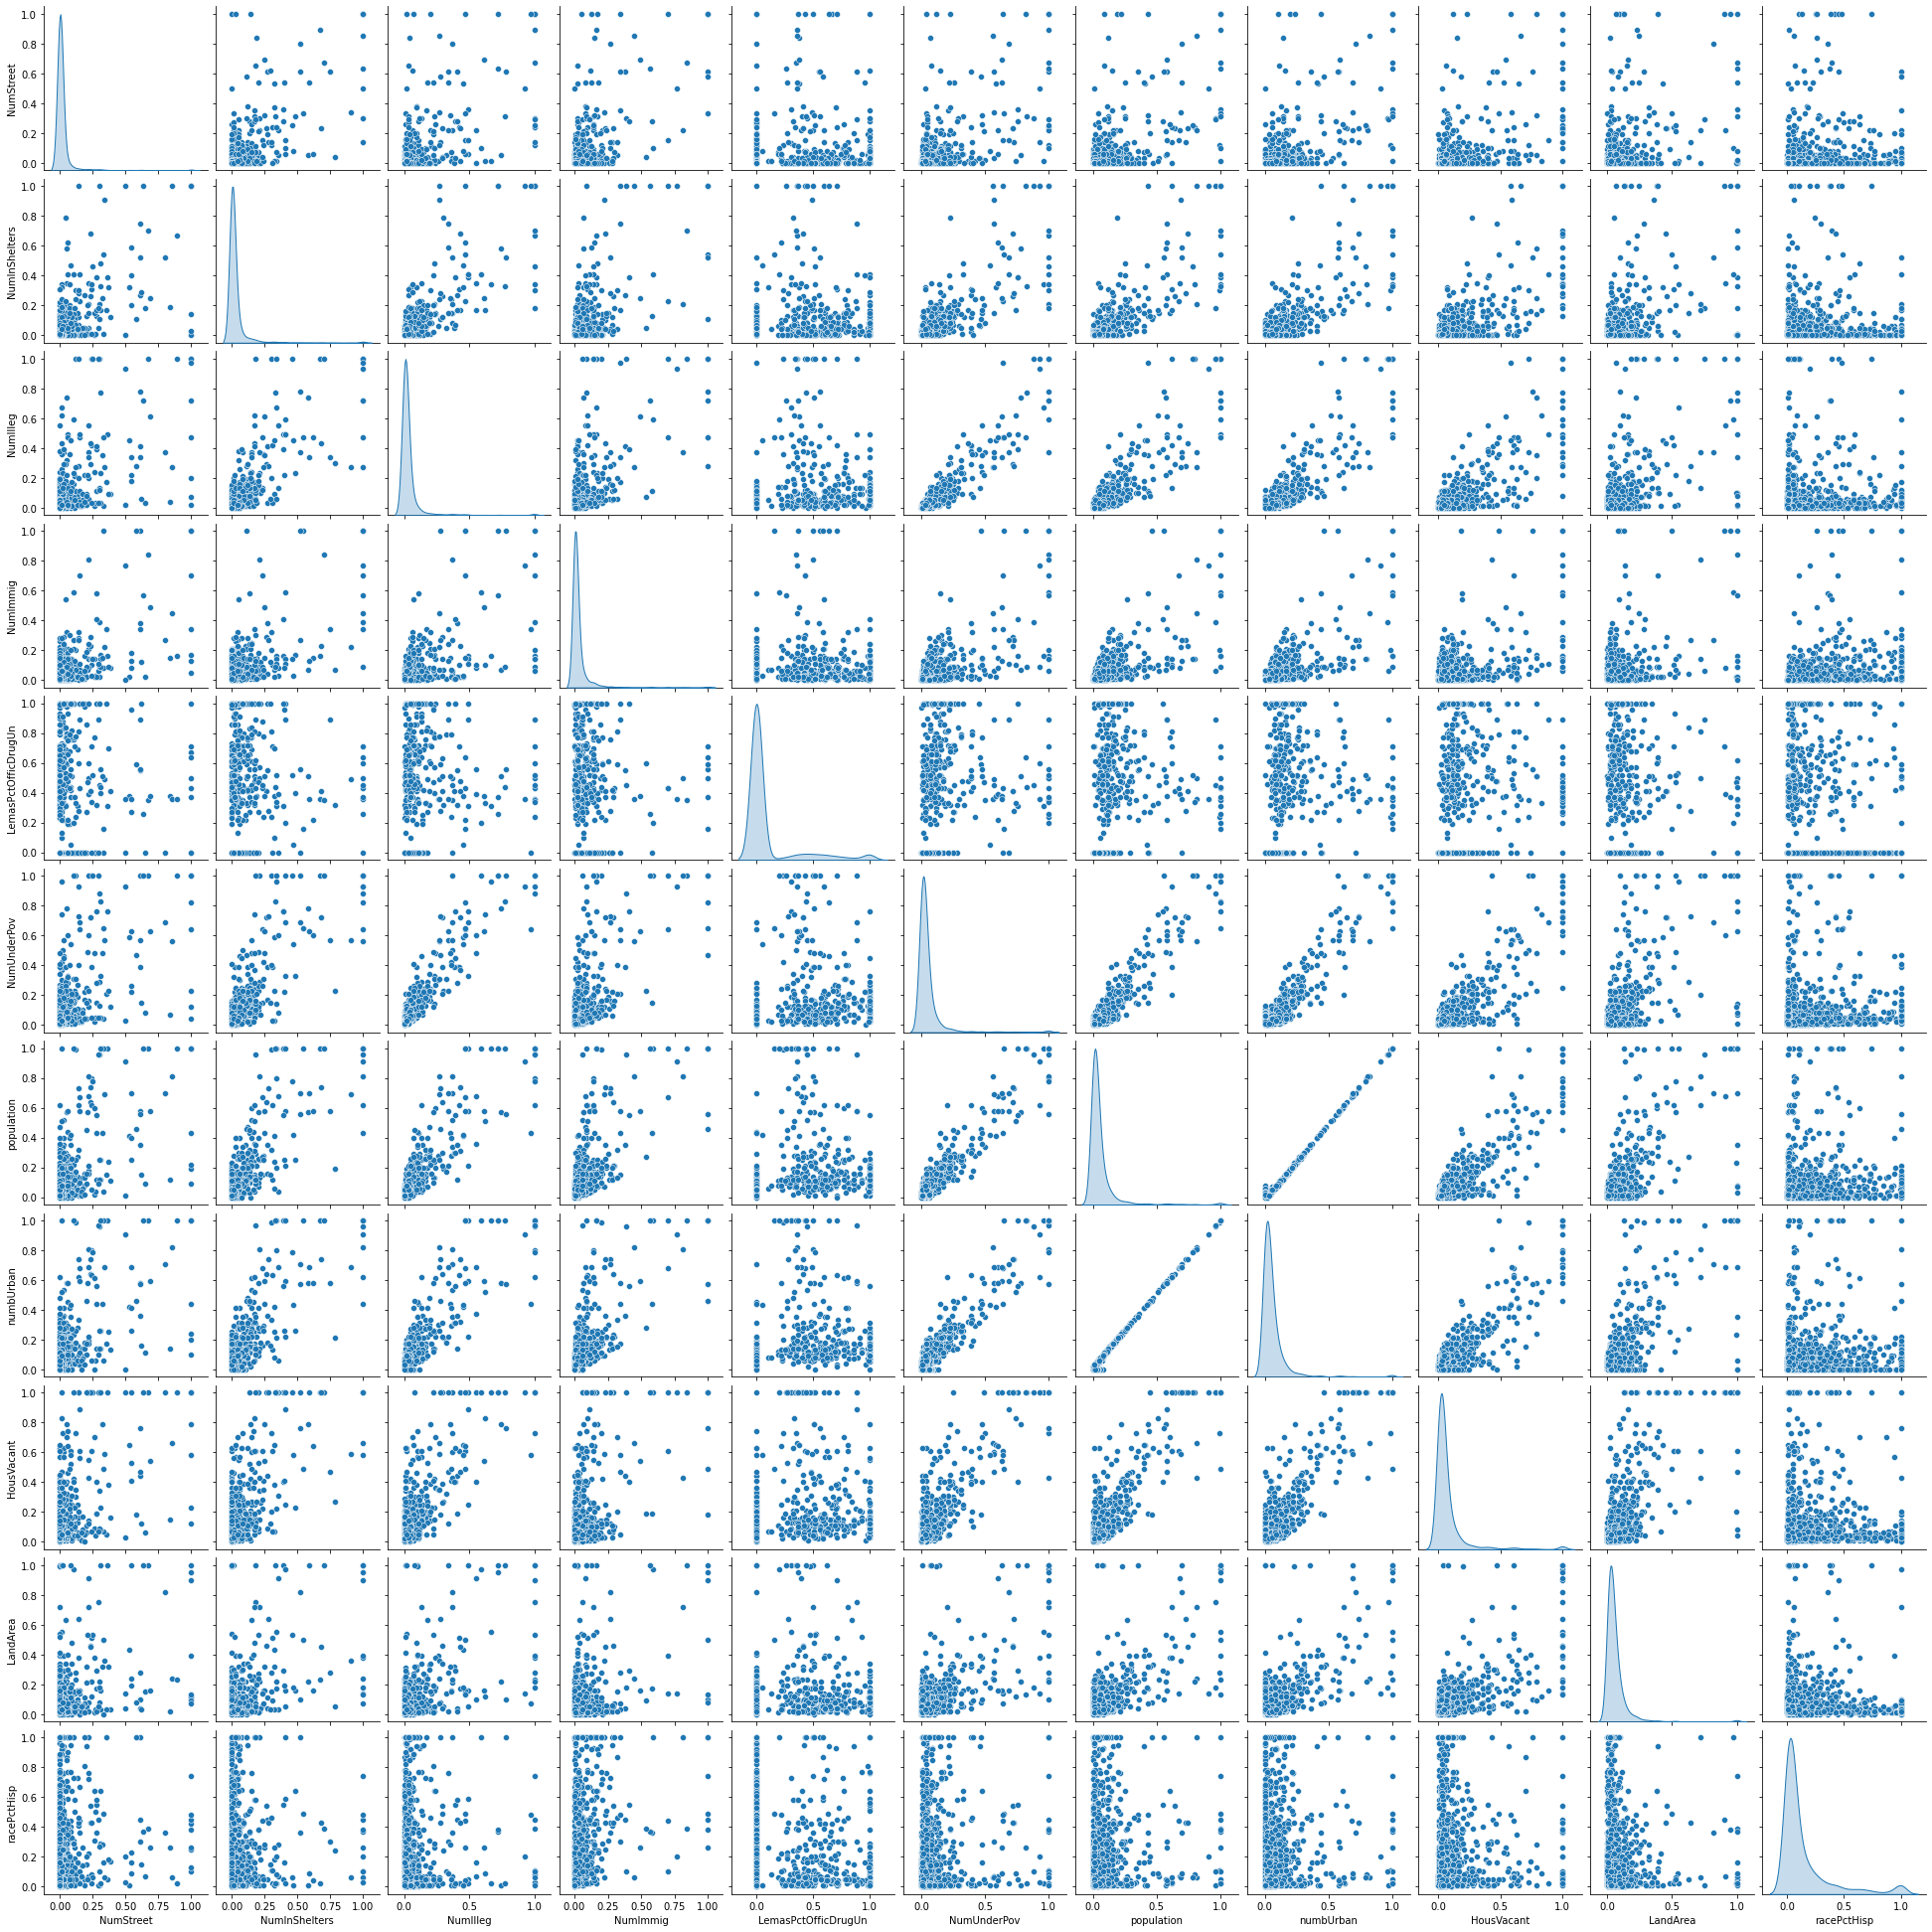

In [264]:
pairplot_fig = sns.pairplot(data[features],kind='scatter',diag_kind='kde')
plt.show()

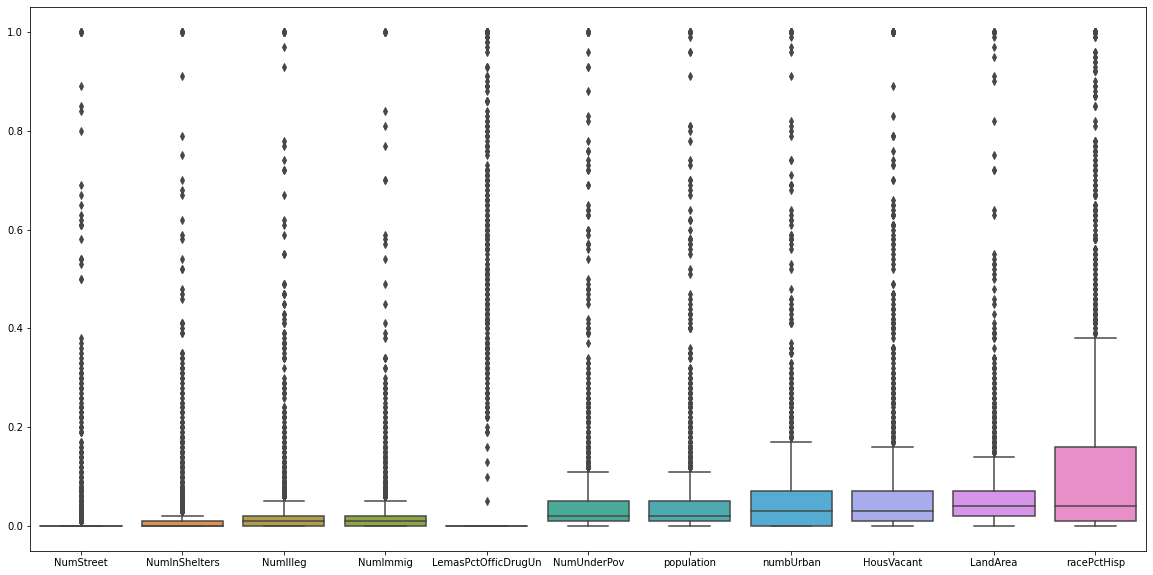

In [265]:
plt.figure(figsize=(20,10))
sns.boxplot(data = data[features])
plt.show()

<h4>1.(f)Fit a linear model using least squares to the training set and report the test error.</h4>

In [266]:
X = new_training.iloc[:,:-1]
Y = new_training.iloc[:,-1]
linear_model = LinearRegression().fit(X, Y)

In [267]:
X2 = new_test.iloc[:,:-1]
Y2 = new_test.iloc[:,-1]
y_hat = linear_model.predict(X2)
print("Test Error:")
mean_squared_error(Y2, y_hat)

Test Error:


5.814203320741234e+18

<h4>1.(g)
Fit a ridge regression model on the training set, with λ chosen by cross-validation.Report the test error obtained.</h4>
<p> Lambda:10, Test Error: 0.01743941921060888</p>

In [268]:
my_cv = KFold(n_splits = 5,shuffle = True,random_state = 222)

In [269]:
model_rid = RidgeCV(alphas=[0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000],cv = my_cv).fit(X, Y)
print('Lambda Selected by cross-validation:')
model_rid.alpha_

Lambda Selected by cross-validation:


10.0

In [270]:
y_hat = model_rid.predict(X2)
print('Test Error:')
mean_squared_error(Y2, y_hat)

Test Error:


0.01743941921060888

<h4>1.(h) Fit a LASSO model on the training set, with λ chosen by cross-validation. </h4>
<p>Lambda:0.0001, Test Erros: 0.01778608951910212</p>

In [271]:
model_lasso = LassoCV(max_iter = 8000,alphas=[0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000],cv = my_cv).fit(X, Y)
print("lambda chosen by cross-validation:")
print(model_lasso.alpha_)
print("List of the variables selcted:")
for i in np.where(model_lasso.coef_!=0)[0]:
    print(X.columns[i],model_lasso.coef_[i])
#print(list(X.columns[np.where(model_lasso.coef_==0)]))
y_hat = model_lasso.predict(X2)
print("Test Error")
mean_squared_error(Y2, y_hat)

lambda chosen by cross-validation:
0.0001
List of the variables selcted:
racepctblack 0.2730520389324695
racePctAsian -0.01798214085557179
agePct12t21 0.07600144588877804
agePct12t29 -0.29112508938747556
agePct65up 0.0038731814543005237
pctUrban 0.04099460840340386
pctWWage -0.09316409100565631
pctWFarmSelf 0.02905820902350229
pctWInvInc -0.11005720598186149
pctWSocSec 0.059237802771638835
pctWPubAsst 0.041822851011604545
pctWRetire -0.10979717754165393
whitePerCap -0.06946043558641372
blackPerCap -0.022540084214983536
indianPerCap -0.031945719112351834
AsianPerCap 0.0292388199675554
OtherPerCap 0.023618876027231672
HispPerCap 0.025708960910019663
PctPopUnderPov -0.15012475708765308
PctLess9thGrade -0.02130048529641226
PctBSorMore 0.017314814759812273
PctEmploy 0.15500979986678243
PctEmplManu -0.019197006359559177
PctOccupManu 0.016491893545625056
MalePctDivorce 0.13263026470846626
MalePctNevMarr 0.150692378761364
FemalePctDiv -0.09557190449850399
PctKids2Par -0.19812838768784485
PctYo

0.01778608951910212

<h3>LASSO Model with standardized features</h3>
<p>Lambda:0.001, Test Error:0.017949170546600612</p>

In [272]:
scaler = preprocessing.StandardScaler().fit(new_training)
scaler2 = preprocessing.StandardScaler().fit(new_test)
train_std = scaler.transform(new_training)
test_std = scaler2.transform(new_test)

X_std = train_std[:,:-1]

X_std2 = test_std[:,:-1]


In [273]:
model_lasso = LassoCV(max_iter = 7900,alphas=[0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000],cv = my_cv).fit(X_std, Y)
print("lambda chosen by cross-validation:")
print(model_lasso.alpha_)
print("List of the variables selcted:")
for i in np.where(model_lasso.coef_!=0)[0]:
    print(X.columns[i],model_lasso.coef_[i])
#print(list(X.columns[np.where(model_lasso.coef_==0)]))
y_hat = model_lasso.predict(X_std2)
print("Test Error")
mean_squared_error(Y2, y_hat)

lambda chosen by cross-validation:
0.001
List of the variables selcted:
racepctblack 0.0668051282578862
agePct12t21 0.005264677333195401
agePct12t29 -0.028571710919034096
pctUrban 0.01566011722377505
pctWWage -0.008793259245822664
pctWFarmSelf 0.002911775031406955
pctWInvInc -0.018109305710560287
pctWSocSec 0.006823629633991926
pctWPubAsst 0.0035144993531645973
pctWRetire -0.015681367394987957
whitePerCap -0.004088978639064071
blackPerCap -0.0031269461222273856
indianPerCap -0.004993349221917837
AsianPerCap 0.004857274113362941
OtherPerCap 0.003445155743500514
HispPerCap 0.003116276640704317
PctPopUnderPov -0.02098410830209546
PctLess9thGrade -0.00017471454321969844
PctEmploy 0.014349934315298692
PctEmplManu -0.00019404105227107006
MalePctDivorce 0.0150613573082528
MalePctNevMarr 0.015087249189481627
FemalePctDiv -0.0024292745612044067
PctKids2Par -0.03964423255931221
PctYoungKids2Par -0.008817592163512153
PctTeen2Par -0.0005692036470137564
PctWorkMom -0.019223940450727908
NumIlleg -0.

0.017949170546600612

<p>The test error for Lasso model with standardized features(0.017949) is slightly higher than the Lasso model with raw features(0.017786).</p>

<h3>1.(i)Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.</h3>
<p> M:91, Test Error:0.018386864526475897</p>

In [274]:
for m in range(1,len(new_training.columns)-1):
    my_kfold = KFold(n_splits=5, random_state=222, shuffle=True)
    my_kfold.split(new_training)
    all_error = 0
    for train_i,test_i in my_kfold.split(new_training):
        train_x_i,test_x_i = new_training.iloc[train_i,:-1],new_training.iloc[test_i,:-1]
        train_y_i,test_y_i = new_training.iloc[train_i,-1],new_training.iloc[test_i,-1]
    
        pca = PCA(n_components=m)
        pca.fit(train_x_i)
        train_x_i2 =  pca.transform(train_x_i)
        test_x_i2 =  pca.transform(test_x_i)
        model_pcr = LinearRegression().fit(train_x_i2, train_y_i)
        y_hat2 = model_pcr.predict(test_x_i2)
        all_error += mean_squared_error(test_y_i, y_hat2)
    
        

In [275]:
def my_pcr(m):
    my_kfold = KFold(n_splits=5, random_state=282, shuffle=True)
    my_kfold.split(new_training)
    all_error = 0
    for train_i,test_i in my_kfold.split(new_training):
        
        train_x_i,test_x_i = new_training.iloc[train_i,:-1],new_training.iloc[test_i,:-1]
        train_y_i,test_y_i = new_training.iloc[train_i,-1],new_training.iloc[test_i,-1]
    
        pca = PCA(n_components=m)
        pca.fit(train_x_i)
        train_x_i2 =  pca.transform(train_x_i)
        test_x_i2 =  pca.transform(test_x_i)
        model_pcr = LinearRegression().fit(train_x_i2, train_y_i)
        y_hat2 = model_pcr.predict(test_x_i2)
        all_error += mean_squared_error(test_y_i, y_hat2)
    return all_error/5  

In [276]:
print('M chosen by cross-validation:')
m_dict = {}
for m in range(1,len(new_training.columns)-1):
    m_dict[m] = my_pcr(m)
sorted(m_dict.items(),key=lambda x:x[1])[0][0]

M chosen by cross-validation:


91

In [277]:
print('Test Error:')
pca = PCA(n_components=91)
pca.fit(X)
train_p = pca.transform(X)
test_p = pca.transform(X2)
model_pcr = LinearRegression().fit(train_p, Y)
y_hat3 = model_pcr.predict(test_p)
mean_squared_error(Y2, y_hat3)

Test Error:


0.01838508019689297

<h4>1.(j) In this section, we would like to fit a boosting tree to the data.</h4>
<p> Alpha(regularization term):1</p>

In [278]:
def my_xgb(alpha1):
    my_kfold = KFold(n_splits=5, random_state=282, shuffle=True)
    my_kfold.split(new_training)
    all_error = 0
    for train_i,test_i in my_kfold.split(new_training):
        
        train_x_i,test_x_i = new_training.iloc[train_i,:-1],new_training.iloc[test_i,:-1]
        train_y_i,test_y_i = new_training.iloc[train_i,-1],new_training.iloc[test_i,-1]
    
        model_xgb = xgb.XGBRegressor(objective ='reg:squarederror', alpha = alpha1).fit(train_x_i,train_y_i)

        y_hat2 = model_xgb.predict(test_x_i)
        all_error += mean_squared_error(test_y_i, y_hat2)
    return all_error/5  

In [279]:
print("Alpha Chosen:")
m_dict = {}
for m in [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]:
    m_dict[m] = my_xgb(m)
sorted(m_dict.items(),key=lambda x:x[1])[0][0]

Alpha Chosen:


1

In [280]:
print("Test Error:")
dmatrix = xgb.DMatrix(data = X,label = Y)
model_xgb = xgb.XGBRegressor(objective ='reg:squarederror', alpha = 1).fit(X,Y)
y_xgb = model_xgb.predict(X2)
mean_squared_error(Y2, y_xgb)

Test Error:


0.017317034514479836

<h1>2.Tree-Based Methods</h1>

<h4>2.(b)
Data Preparation
This data set has
missing values
. When the number of data with missing values
is significant, discarding them is not a good idea.</h4>

<h5>i.
Research what types of techniques are usually used for dealing with data with
missing values.

Pick at least one of them and apply it to this data in the
next steps.
</h5>

<p>1.Simple Strategt: remove samples that cotain a missing value. Although it is very easy to be implemented, it works poorly if the percentage of missing values is high.</p>
<p>2. Data Inputation:using a model to replace missing values</p>
<p>2.1 Constant value distinct from all other values(categorical features), feature value from another randomly selected observatiion, Statistics such as mean, median or mode value of feature.</p>
<p>2.2 A value estimated by another predictive model</p>
<p>2.3 An iterative method based on Expectation Maximization</p>
<p>The technique I'm using for this task is data inputing with mean value </p>

In [281]:
data2_train = pd.read_csv("../data/aps_failure/aps_failure_training_set.csv",skiprows = 20,na_values = 'na')
data2_test = pd.read_csv("../data/aps_failure/aps_failure_test_set.csv",skiprows = 20,na_values = 'na')

In [282]:
data2_train.loc[data2_train['class'] == 'pos','class'] = 1
data2_train.loc[data2_train['class'] == 'neg','class'] = 0
data2_train

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,0,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,0,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,0,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [283]:
data2_test.loc[data2_test['class'] == 'pos','class'] = 1
data2_test.loc[data2_test['class'] == 'neg','class'] = 0
data2_test

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,0,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,0,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,0,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,0,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,0,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,0,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,0,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [284]:
alldata2 = data2_train.append(data2_test,ignore_index = True)
alldata2

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,0,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
75996,0,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
75997,0,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
75998,0,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [285]:
imp_mean2 = SimpleImputer(missing_values = np.nan,strategy = 'mean')
new_d2 = imp_mean2.fit_transform(alldata2)
#imp_mean2.transform(data2_train)
all_data2 = pd.DataFrame(imp_mean2.transform(new_d2),columns = alldata2.columns)
new_training2 = pd.DataFrame(imp_mean2.transform(new_d2[:60000,:]),columns = alldata2.columns)
new_training2

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.0,76698.0,0.72556,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0.0,33058.0,0.72556,0.000000e+00,150629.962105,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0.0,41040.0,0.72556,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0.0,12.0,0.00000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0.0,60874.0,0.72556,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,153002.0,0.72556,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,0.0,2286.0,0.72556,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,112.0,0.00000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,0.0,80292.0,0.72556,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [286]:
new_test2 = pd.DataFrame(imp_mean2.transform(new_d2[60000:,:]),columns = alldata2.columns)
new_test2

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.0,60.0,0.00000,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,0.0,82.0,0.00000,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,0.0,66002.0,2.00000,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,0.0,59816.0,0.72556,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,0.0,1814.0,0.72556,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0.0,81852.0,0.72556,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,0.0,18.0,0.00000,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,0.0,79636.0,0.72556,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,0.0,110.0,0.72556,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


<h4>ii.For each of the 170 features, calculate the coefficient of variation</h4>

In [287]:
all_data22 = all_data2.iloc[:,1:]
#all_data2

In [288]:
c_v = {}
c_v2 = {}
for i in all_data22.columns:
    c_v[i] = [all_data22[i].std()/all_data22[i].mean()]
    c_v2[i] = all_data22[i].std()/all_data22[i].mean()
pd.DataFrame(data = c_v)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,4.328608,2.178273,2.167653,206.7215,22.29367,18.209016,91.460654,42.084343,17.625909,8.7533,...,2.603613,2.573291,2.625407,2.858261,3.23101,4.885098,3.335037,5.753933,47.919544,45.65095


<h4>iii.
Plot a correlation matrix for your features using pandas or any other tool.</h4>

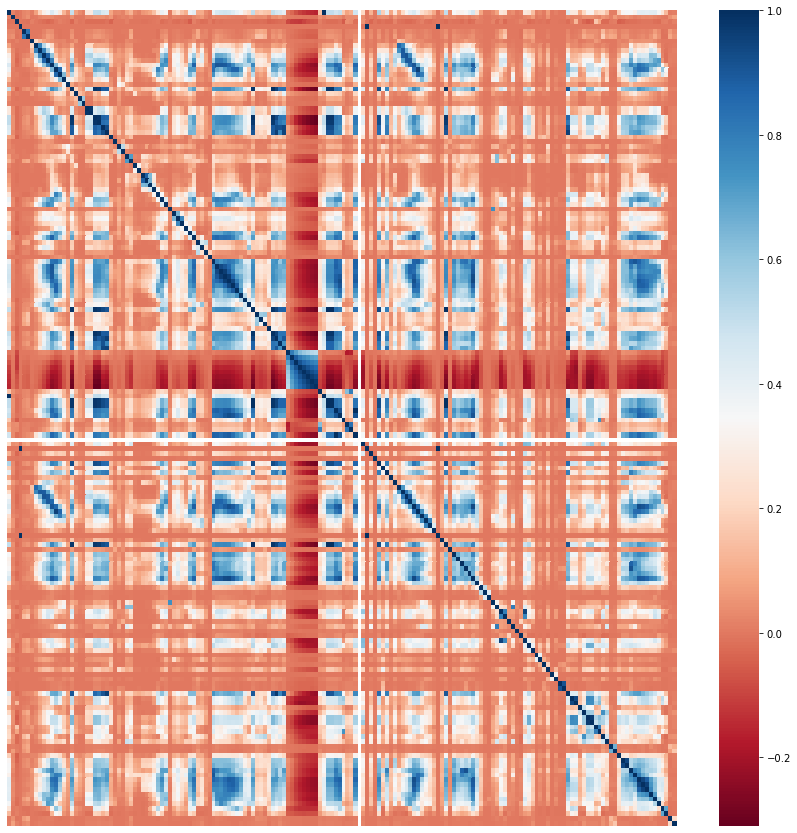

In [289]:
plt.figure(figsize=(15,15))
sn.heatmap(all_data22.corr(), xticklabels=False, yticklabels=False,cmap='RdBu')
plt.show()

<h4>i.v Pick √170 features with highest CV , and make scatter plots and box plots for them.an you draw conclusions about
significance of those features, just by the scatter plots? This does not mean
that you will only use those features in the following questions. We picked
them only for visualization.</h4>

<p>It's hard to draw conclusions about significance of those features just by scatter plot. I can't derive any obvious pattern based on the plot.</p>

In [290]:
selected_features = sorted(c_v2.items(),key = lambda x:-x[1])[:math.floor(math.sqrt(170))]
features = [i[0] for i in selected_features]
features.append('class')
features

['cf_000',
 'co_000',
 'ad_000',
 'cs_009',
 'dj_000',
 'as_000',
 'dh_000',
 'df_000',
 'ag_000',
 'au_000',
 'ak_000',
 'az_009',
 'ay_009',
 'class']

In [291]:
print('Features chosen with highest CV:')
selected_features

Features chosen with highest CV:


[('cf_000', 207.2702736886315),
 ('co_000', 206.87612939952814),
 ('ad_000', 206.72149958176453),
 ('cs_009', 192.52261084543085),
 ('dj_000', 122.12815277529702),
 ('as_000', 113.88275538316807),
 ('dh_000', 112.65245027418743),
 ('df_000', 111.36966565765684),
 ('ag_000', 91.46065359583645),
 ('au_000', 86.0856375114368),
 ('ak_000', 78.62298773590766),
 ('az_009', 77.99955638588112),
 ('ay_009', 77.46110130112072)]

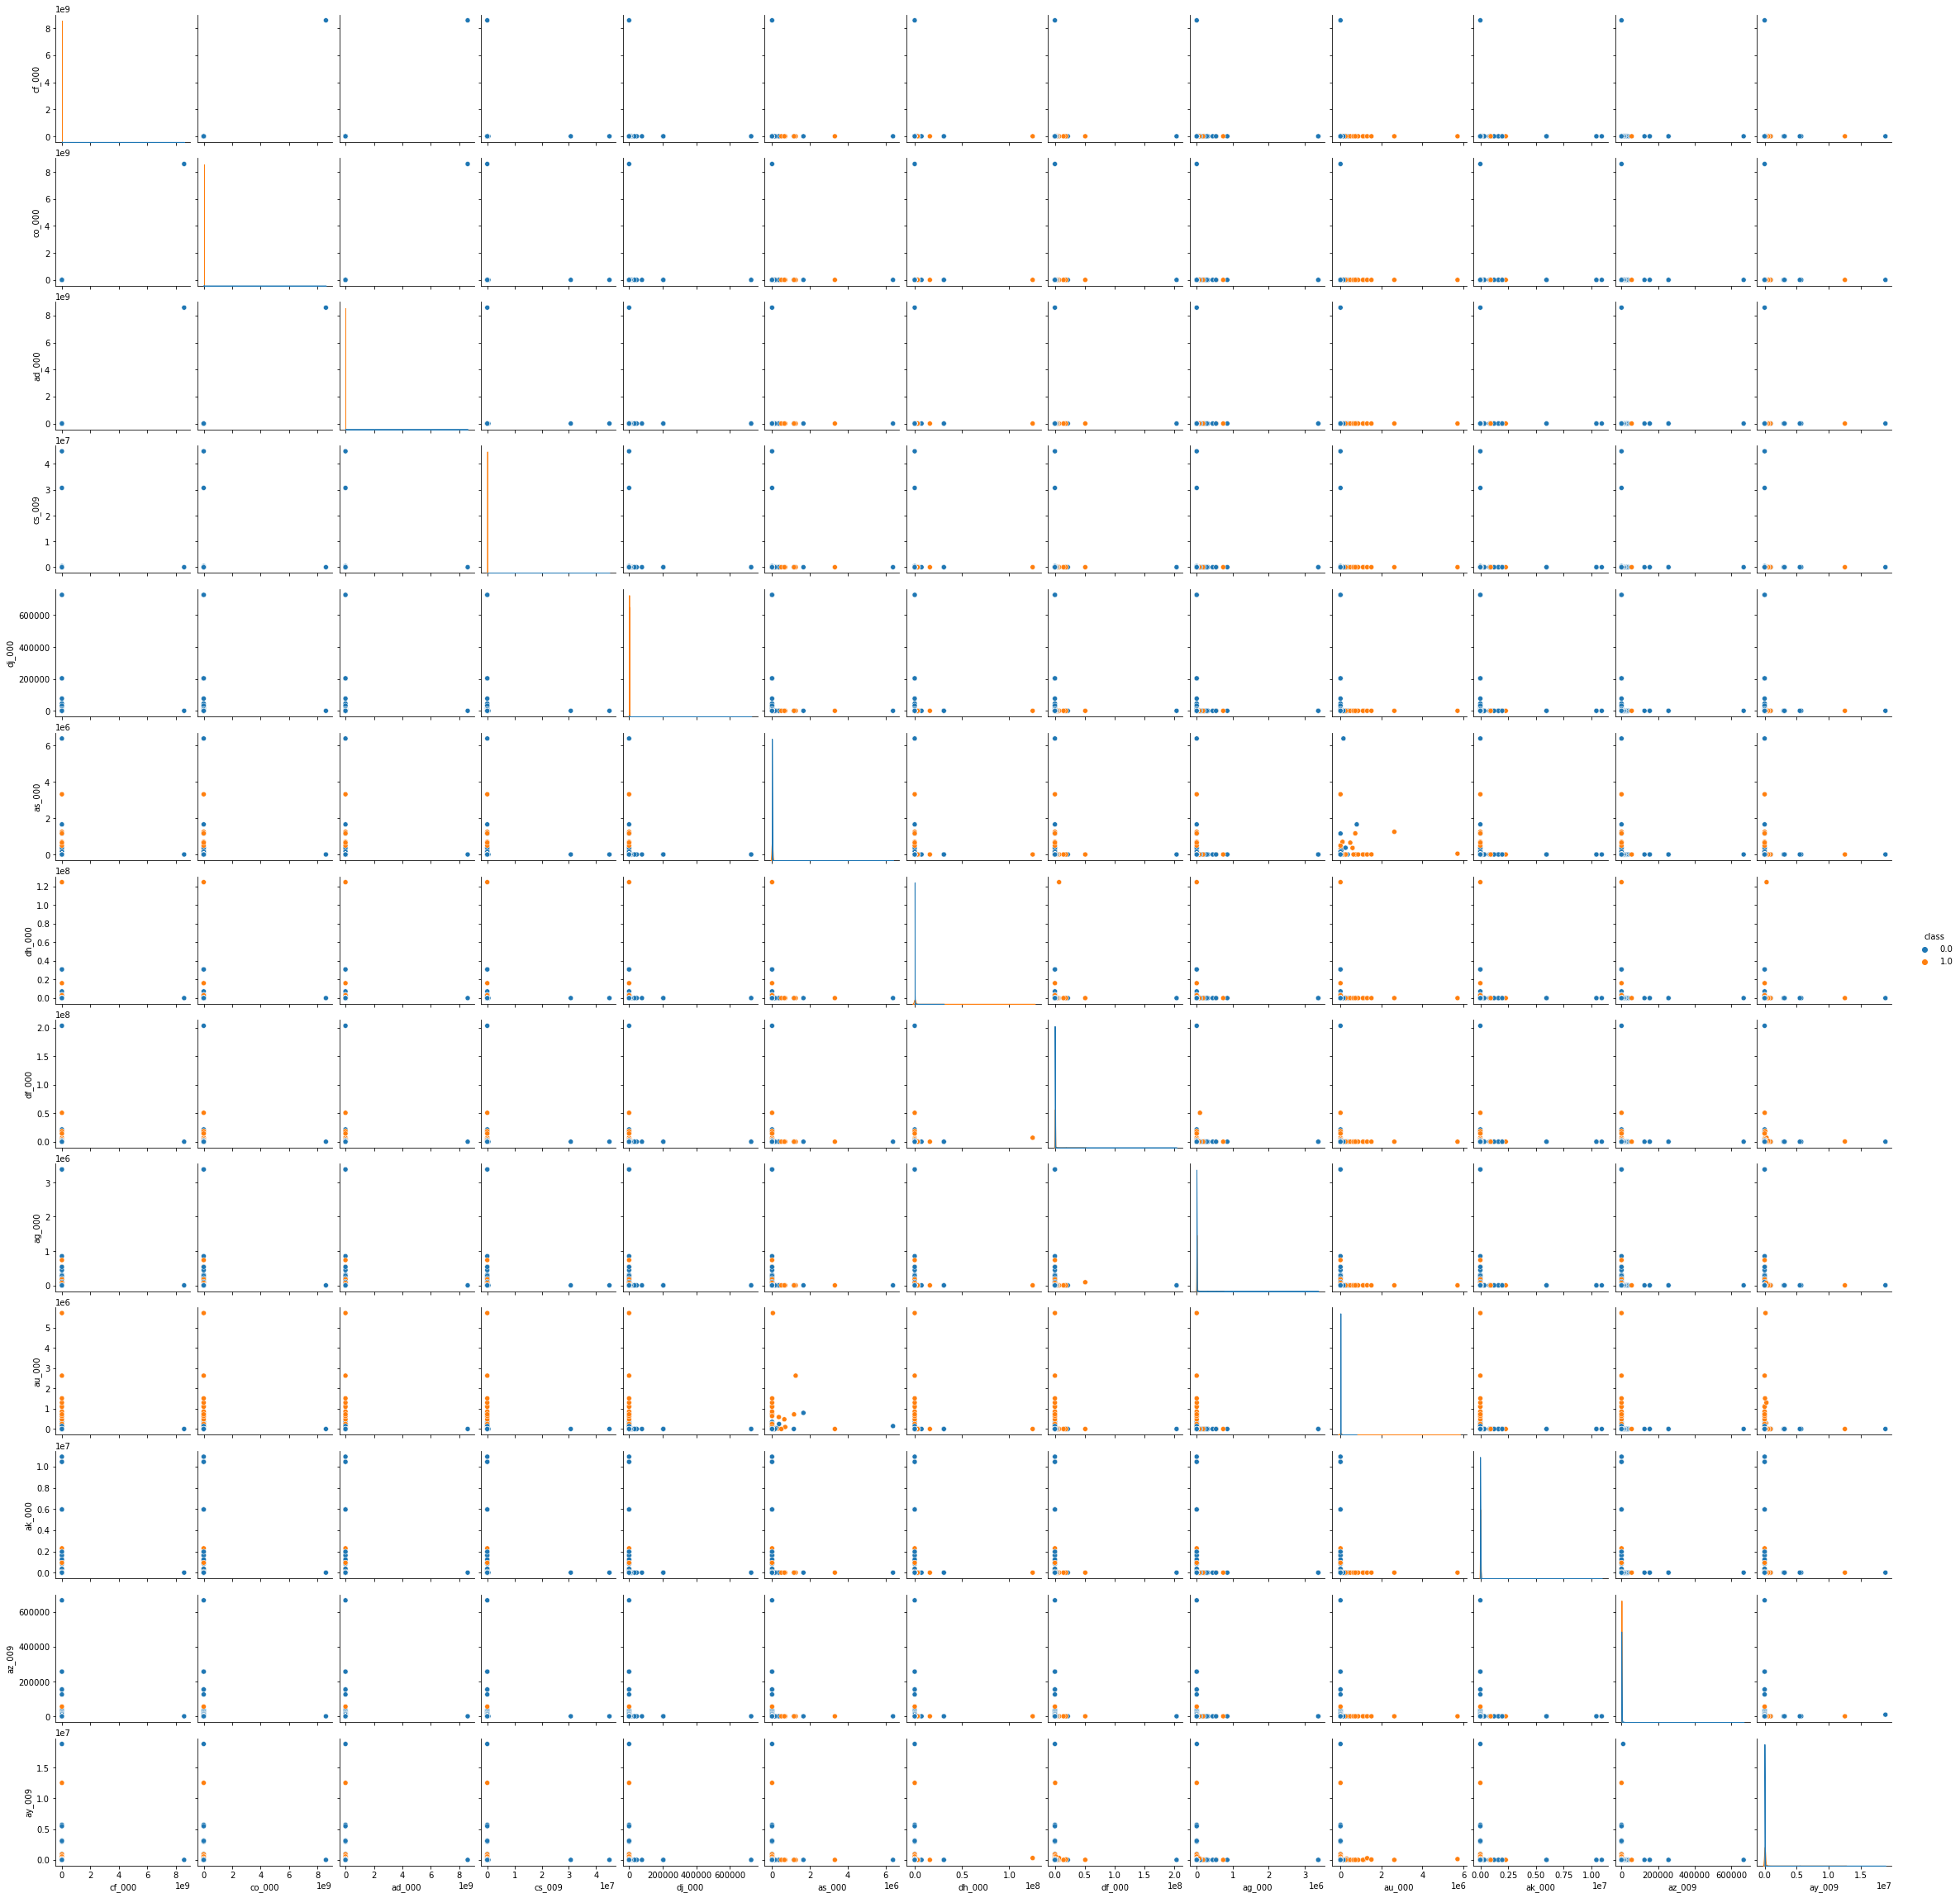

In [292]:
pairplot_fig = sns.pairplot(all_data2[features],kind='scatter',diag_kind='kde',hue = 'class')
plt.show()

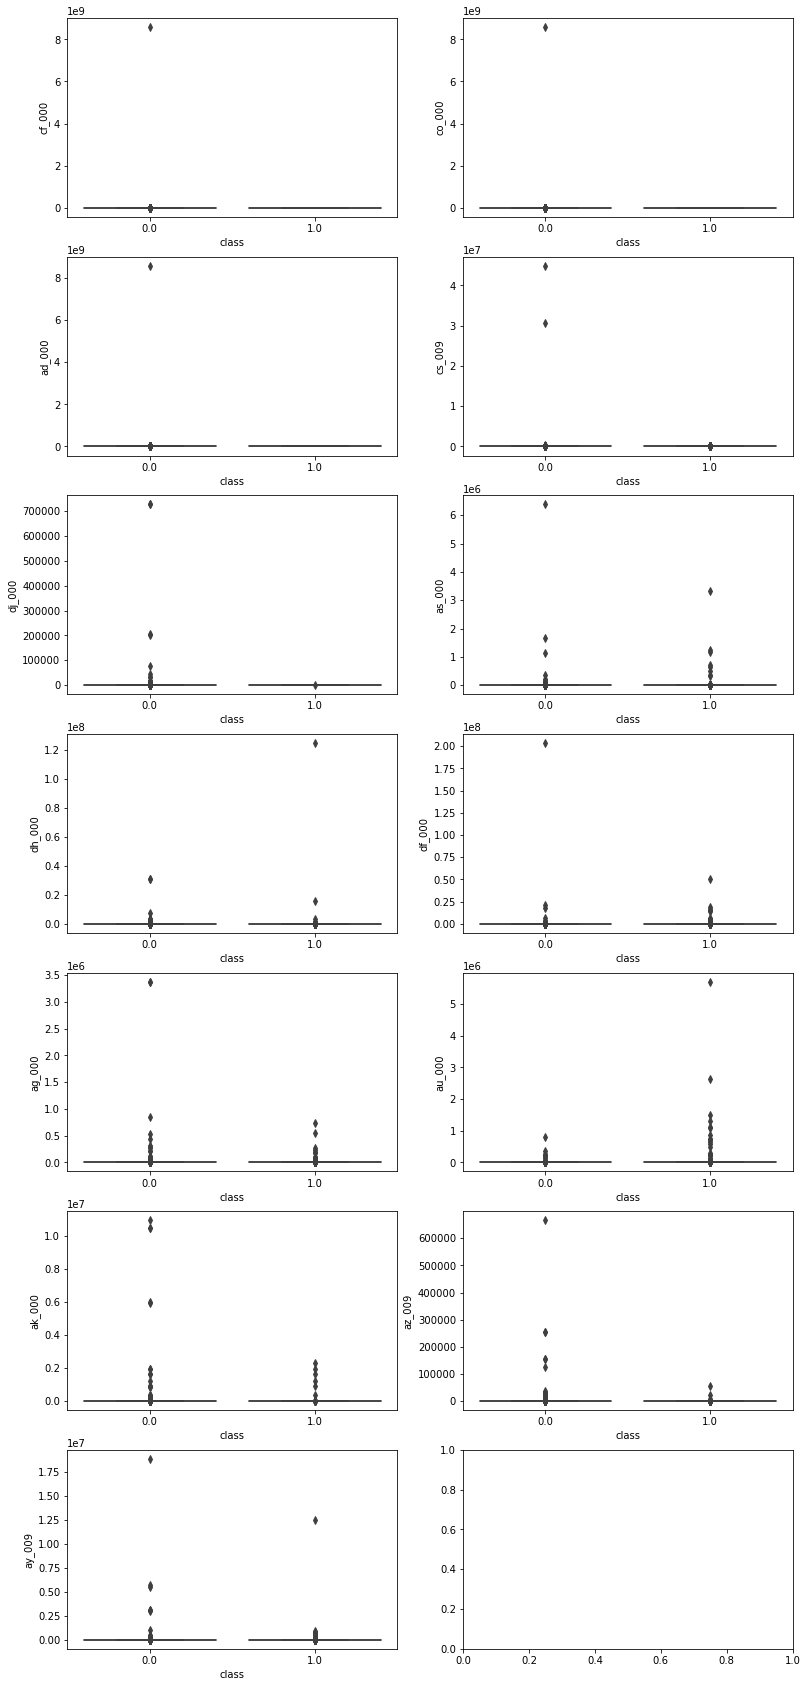

In [293]:
fig,axes = plt.subplots(7,2,figsize = (13,30))

#features2 = features
#features2.append('bb_000')
sns.boxplot(data = all_data2[features],x = 'class',y = 'cf_000',ax = axes[0,0])
sns.boxplot(data = all_data2[features],x = 'class',y = 'co_000',ax = axes[0,1])
sns.boxplot(data = all_data2[features],x = 'class',y = 'ad_000',ax = axes[1,0])
sns.boxplot(data = all_data2[features],x = 'class',y = 'cs_009',ax = axes[1,1])


sns.boxplot(data = all_data2[features],x = 'class',y = 'dj_000',ax = axes[2,0])
sns.boxplot(data = all_data2[features],x = 'class',y = 'as_000',ax = axes[2,1])
sns.boxplot(data = all_data2[features],x = 'class',y = 'dh_000',ax = axes[3,0])
sns.boxplot(data = all_data2[features],x = 'class',y = 'df_000',ax = axes[3,1])

sns.boxplot(data = all_data2[features],x = 'class',y = 'ag_000',ax = axes[4,0])
sns.boxplot(data = all_data2[features],x = 'class',y = 'au_000',ax = axes[4,1])
sns.boxplot(data = all_data2[features],x = 'class',y = 'ak_000',ax = axes[5,0])
sns.boxplot(data = all_data2[features],x = 'class',y = 'az_009',ax = axes[5,1])

sns.boxplot(data = all_data2[features],x = 'class',y = 'ay_009',ax = axes[6,0])
plt.show()

<h4>v.Determine the number of positive and negative data. Is this data set imbalanced?</h4>
<p> Negative: 74625, Positive: 1375</p>
<p> The data set is imbalanced because there is a large discrepancy(73250) between the number of negative class and positive class</p>

In [294]:
print('negative class')
print(all_data2[all_data2['class']==0].shape[0])
print('positive class')
print(all_data2[all_data2['class']==1].shape[0])

negative class
74625
positive class
1375


In [295]:
print('positive class')
print(all_data2[all_data2['class']==1].shape[0])

positive class
1375


<h4>2.(c)
Train a random forest to classify the data set. Do NOT compensate for class
imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and
misclassification for training and test sets and report them (You may use pROC
package). Calculate Out of Bag error estimate for your random forset and compare
it to the test error.</h4>

<p>Out of Bag Error:0.014100000000000001</p>
<p>Test Error:0.019062499999999982</p>
<p> the Out of Bag Error is lower than the test Error</p>

In [296]:
#new_training2

In [297]:
X_train2 = new_training2.iloc[:,1:]
Y_train2 =  new_training2.iloc[:,0]

X_test2 = new_test2.iloc[:,1:]
Y_test2 =  new_test2.iloc[:,0]
model_rf = RandomForestClassifier(max_depth=2, random_state=0,oob_score = True)
model_rf.fit(X_train2,Y_train2)

y_rf_train = model_rf.predict(X_train2)
y_rf_test = model_rf.predict(X_test2)

y_rf_train_prob = model_rf.predict_proba(X_train2)[:,1]
y_rf_test_prob = model_rf.predict_proba(X_test2)[:,1]

Training

Accuracy:
0.9861
confusion matrix:
[[58978    22]
 [  812   188]]
AUC:0.9723404237288135


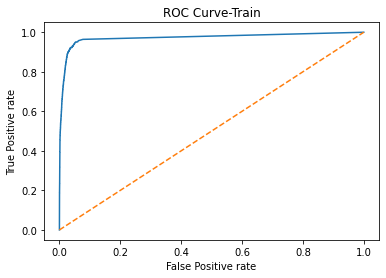

In [298]:
print("Training")
print("")
print("Accuracy:")
print(model_rf.score(X_train2,Y_train2))
print("confusion matrix:")
print(confusion_matrix(Y_train2,y_rf_train))
false_p,true_p,th = metrics.roc_curve(Y_train2,y_rf_train_prob,pos_label = 1)
auc = metrics.auc(false_p, true_p)
print("AUC:"+str(auc))

plt.title("ROC Curve-Train")
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.plot(false_p,true_p )
plt.plot([0, 1], [0, 1],'--')

plt.show()

Testing

Accuracy:
0.9809375
confusion matrix:
[[15624     1]
 [  304    71]]
AUC:0.9805469013333333


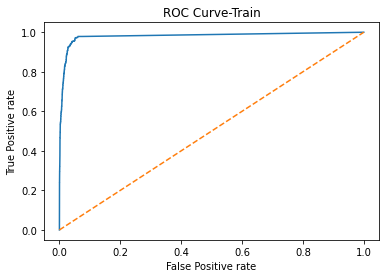

In [299]:
print("Testing")
print("")
print("Accuracy:")
print(model_rf.score(X_test2,Y_test2))
print("confusion matrix:")
print(confusion_matrix(Y_test2,y_rf_test))
false_p,true_p,th = metrics.roc_curve(Y_test2,y_rf_test_prob,pos_label = 1)
auc = metrics.auc(false_p, true_p)
print("AUC:"+str(auc))

plt.title("ROC Curve-Train")
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.plot(false_p,true_p )
plt.plot([0, 1], [0, 1],'--')

plt.show()


In [300]:
print("Comparision:")
print("OOB_error:")
print(1-model_rf.oob_score_)
print("test_error:")
print(1-model_rf.score(X_test2,Y_test2))

Comparision:
OOB_error:
0.014100000000000001
test_error:
0.019062499999999982


<h4>(d)
Research how class imbalance is addressed in random forests. Compensate for
class imbalance in your random forest and repeat 2c. Compare the results with
those of 2c.</h4>
<p>By specifying the class_weight = 'balanced', the random forests model uses the y value to inversely adjust weights propotional to class frequncies as n_samples / (n_classes * np.bincount(y))</p>
<p> The test error(0.06) of balanced random forests is larger than the test error of unbalanced random forests model(0.019). However, the true positive rate has increased a lot in the balanced model from 0.23 to 0.968. The performance on classifying minority class(positive) has been improved.</p>

Training(Balanced)

Accuracy:
0.9358333333333333
confusion matrix:
[[55203  3797]
 [   53   947]]
AUC:0.977197915254237


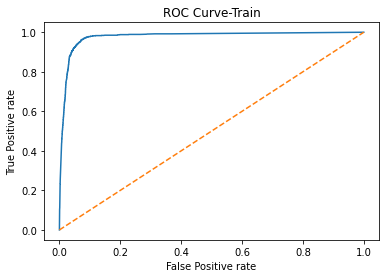

Testing(Balanced)

Accuracy:
0.93975
confusion matrix:
[[14673   952]
 [   12   363]]
AUC:0.9834438826666666


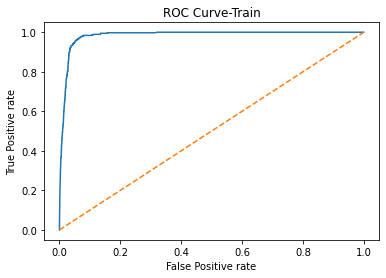

In [301]:
model_rf = RandomForestClassifier(max_depth=2, random_state=0,oob_score = True,class_weight = 'balanced')
model_rf.fit(X_train2,Y_train2)

y_rf_train = model_rf.predict(X_train2)
y_rf_test = model_rf.predict(X_test2)

y_rf_train_prob = model_rf.predict_proba(X_train2)[:,1]
y_rf_test_prob = model_rf.predict_proba(X_test2)[:,1]


print("Training(Balanced)")
print("")
print("Accuracy:")
print(model_rf.score(X_train2,Y_train2))
print("confusion matrix:")
print(confusion_matrix(Y_train2,y_rf_train))
false_p,true_p,th = metrics.roc_curve(Y_train2,y_rf_train_prob,pos_label = 1)
auc = metrics.auc(false_p, true_p)
print("AUC:"+str(auc))

plt.title("ROC Curve-Train")
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.plot(false_p,true_p )
plt.plot([0, 1], [0, 1],'--')

plt.show()

print("Testing(Balanced)")
print("")
print("Accuracy:")
print(model_rf.score(X_test2,Y_test2))
print("confusion matrix:")
print(confusion_matrix(Y_test2,y_rf_test))
false_p,true_p,th = metrics.roc_curve(Y_test2,y_rf_test_prob,pos_label = 1)
auc = metrics.auc(false_p, true_p)
print("AUC:"+str(auc))

plt.title("ROC Curve-Train")
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.plot(false_p,true_p )
plt.plot([0, 1], [0, 1],'--')

plt.show()


In [302]:
print("Comparision:")
print("OOB_error:")
print(1-model_rf.oob_score_)
print("test_error:")
print(1-model_rf.score(X_test2,Y_test2))

Comparision:
OOB_error:
0.06425000000000003
test_error:
0.060250000000000026


In [303]:
print('below running slow............................')

below running slow............................


<h4>(e) Model Trees</h4>

<p>I choose 5-fold cross-validation. The error of trained model based on 5-fold cross validation is 0.00855, and Test error is 0.009625. The trained model performs better on the training dataset with a slightly smaller train error.</p>

In [63]:
import weka.core.jvm as jvm
import javabridge
from weka.core.converters import Loader, Saver
from weka.classifiers import Classifier,Evaluation
from weka.core.classes import Random

In [64]:
jvm.start(packages=True)
import weka.core.packages as packages
packages.install_package("SMOTE")

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/Users/mo/opt/anaconda3/lib/python3.8/site-packages/javabridge/jars/rhino-1.7R4.jar', '/Users/mo/opt/anaconda3/lib/python3.8/site-packages/javabridge/jars/runnablequeue.jar', '/Users/mo/opt/anaconda3/lib/python3.8/site-packages/javabridge/jars/cpython.jar', '/Users/mo/opt/anaconda3/lib/python3.8/site-packages/weka/lib/python-weka-wrapper.jar', '/Users/mo/opt/anaconda3/lib/python3.8/site-packages/weka/lib/weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support enabled


True

In [65]:
new_training3 = new_training2
new_test3 = new_test2
new_training3.loc[new_training3['class'] == 1,'class'] = 'pos'
new_training3.loc[new_training3['class'] == 0,'class'] = 'neg'


new_test3.loc[new_test3['class'] == 1,'class'] = 'pos'
new_test3.loc[new_test3['class'] == 0,'class'] = 'neg'

In [66]:

new_training3.to_csv('../data/aps_failure/t1_weka.csv',index = False)
new_test3.to_csv('../data/aps_failure/t2_weka.csv',index = False)

In [67]:
pd.read_csv('../data/aps_failure/t1_weka.csv')

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698.0,0.72556,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058.0,0.72556,0.000000e+00,150629.962105,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040.0,0.72556,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12.0,0.00000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874.0,0.72556,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002.0,0.72556,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286.0,0.72556,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112.0,0.00000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292.0,0.72556,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [68]:
myload = Loader(classname="weka.core.converters.CSVLoader")
train_weka = myload.load_file("../data/aps_failure/t1_weka.csv")
test_weka = myload.load_file("../data/aps_failure/t2_weka.csv")

In [69]:
train_weka.class_is_first()
test_weka.class_is_first()

In [101]:
weka_classifier = Classifier(classname="weka.classifiers.trees.LMT")
evaluation = Evaluation(train_weka)
evaluation.crossvalidate_model(weka_classifier, train_weka, 5, Random(222))

In [102]:
print(evaluation.summary())


Correctly Classified Instances       59487               99.145  %
Incorrectly Classified Instances       513                0.855  %
Kappa statistic                          0.7173
Mean absolute error                      0.0117
Root mean squared error                  0.0842
Relative absolute error                 35.6712 %
Root relative squared error             65.7858 %
Total Number of Instances            60000     



In [103]:
weka_classifier.build_classifier(train_weka)

Training

Accuracy:
0.9946166666666667
confusion matrix:
[[58935    65]
 [  258   742]]
AUC:0.988252152542373


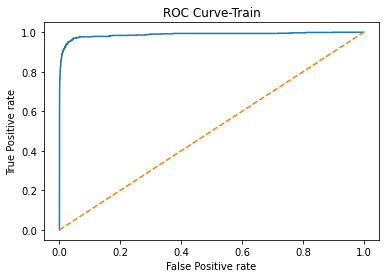

In [104]:
predict_train_weka = []
proba_train_weka = []
for datum in train_weka:
    predict_train_weka.append(weka_classifier.classify_instance(datum))
    proba_train_weka.append(weka_classifier.distribution_for_instance(datum)[1])
    
new_training2.loc[new_training2['class'] == 'pos','class'] = 1
new_training2.loc[new_training2['class'] == 'neg','class'] = 0
true_label_train = new_training2['class'].astype('int64')

print("Training")
print("")
print("Accuracy:")
print(1-mean_squared_error(new_training2['class'],predict_train_weka))
print("confusion matrix:")
print(confusion_matrix(true_label_train,predict_train_weka))
false_p,true_p,th = metrics.roc_curve(true_label_train,proba_train_weka,pos_label = 1)
auc = metrics.auc(false_p, true_p)
print("AUC:"+str(auc))

plt.title("ROC Curve-Train")
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.plot(false_p,true_p )
plt.plot([0, 1], [0, 1],'--')

plt.show()

Testing

Accuracy:
0.990375
confusion matrix:
[[15577    48]
 [  106   269]]
AUC:0.9724980906666665


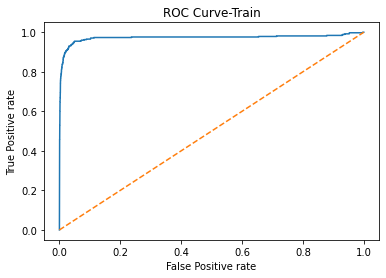

In [105]:
predict_test_weka = []
proba_test_weka = []
for datum in test_weka:
    predict_test_weka.append(weka_classifier.classify_instance(datum))
    proba_test_weka.append(weka_classifier.distribution_for_instance(datum)[1])
    
new_test2.loc[new_test2['class'] == 'pos','class'] = 1
new_test2.loc[new_test2['class'] == 'neg','class'] = 0
true_label = new_test2['class'].astype('int64')

print("Testing")
print("")
print("Accuracy:")
print(1-mean_squared_error(new_test2['class'],predict_test_weka))
print("confusion matrix:")
print(confusion_matrix(true_label,predict_test_weka))
false_p,true_p,th = metrics.roc_curve(true_label,proba_test_weka,pos_label = 1)
auc = metrics.auc(false_p, true_p)
print("AUC:"+str(auc))

plt.title("ROC Curve-Train")
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.plot(false_p,true_p )
plt.plot([0, 1], [0, 1],'--')

plt.show()

<h4>(f).Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your
data to compensate for class imbalance. </h4>
<p> The test error(0.044) on compensated model is larger than the one with uncompensated model.(0.001).</p>

In [57]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [58]:
Counter(new_training2['class'])

Counter({0.0: 59000, 1.0: 1000})

In [59]:
sm = SMOTE(random_state=42,sampling_strategy = 0.2)
train_balan,train_y_balan = sm.fit_resample(new_training2.iloc[:,1:], new_training2.iloc[:,0].astype('int64'))

In [60]:
Counter(train_y_balan)

Counter({0: 59000, 1: 11800})

In [61]:
train_balan['class'] = train_y_balan

In [62]:
train_balan

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
0,76698.000000,0.725560,2.130706e+09,280.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,4.933840e+05,7.210440e+05,4.697920e+05,3.391560e+05,1.579560e+05,7.322400e+04,0.000000,0.000000,0.000000,0
1,33058.000000,0.725560,0.000000e+00,150629.962105,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.780640e+05,2.933060e+05,2.454160e+05,1.336540e+05,8.114000e+04,9.757600e+04,1500.000000,0.000000,0.000000,0
2,41040.000000,0.725560,2.280000e+02,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.598120e+05,4.239920e+05,4.095640e+05,3.207460e+05,1.580220e+05,9.512800e+04,514.000000,0.000000,0.000000,0
3,12.000000,0.000000,7.000000e+01,66.000000,0.000000,10.000000,0.000000,0.000000,0.000000e+00,3.180000e+02,...,4.600000e+01,5.800000e+01,4.400000e+01,1.000000e+01,0.000000e+00,0.000000e+00,0.000000,4.000000,32.000000,0
4,60874.000000,0.725560,1.368000e+03,458.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,2.297900e+05,4.052980e+05,3.471880e+05,2.869540e+05,3.115600e+05,4.339540e+05,1218.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70795,595078.394646,0.522243,3.564398e+08,150629.962105,6.736959,10.836314,4535.671239,154405.820084,1.027300e+06,5.287806e+06,...,8.978055e+05,2.166989e+06,4.897451e+06,5.284637e+06,8.801969e+06,2.367219e+05,531.130457,0.085197,0.219044,1
70796,108372.267556,5.896950,8.744381e+02,741.281732,0.000000,0.000000,0.000000,11340.256798,1.624344e+05,1.467875e+06,...,4.350257e+05,8.066096e+05,1.199755e+06,8.551693e+05,2.938058e+05,1.768512e+04,0.000000,0.000000,0.000000,1
70797,523303.588889,0.725560,1.637600e+03,49316.111442,0.000000,0.000000,0.000000,0.000000,3.019671e+02,4.443348e+04,...,2.525950e+06,4.437216e+06,3.083032e+06,2.157983e+06,1.291100e+06,2.192301e+06,67311.114990,0.000000,0.000000,1
70798,548220.530959,0.242478,1.392918e+03,2071.538021,0.000000,0.000000,0.000000,21538.847984,6.935356e+05,8.358055e+06,...,1.815185e+06,4.098427e+06,7.598831e+06,4.872729e+06,9.696839e+05,5.723848e+04,11.984498,0.000000,0.000000,1


In [115]:
#weka.filters.supervised.instance.SMOTE

In [56]:
from weka.filters import Filter
from weka.classifiers import FilteredClassifier

In [76]:
smote = Filter(classname="weka.filters.supervised.instance.SMOTE",options=["-P", "1080.0"])
smote_c = Classifier(classname="weka.classifiers.trees.LMT")
my_filter = FilteredClassifier()
my_filter.filter = smote
my_filter.classifier = smote_c


evaluation_smote = Evaluation(train_weka)
evaluation_smote.crossvalidate_model(my_filter, train_weka, 5, Random(222))

In [77]:
print(evaluation_smote.summary())


Correctly Classified Instances       59266               98.7767 %
Incorrectly Classified Instances       734                1.2233 %
Kappa statistic                          0.6722
Mean absolute error                      0.0197
Root mean squared error                  0.1033
Relative absolute error                 60.0657 %
Root relative squared error             80.7065 %
Total Number of Instances            60000     



In [114]:
print("Before SMOTE:")
print(Counter(new_training2['class']))
print("After SMOTE:")
sm = SMOTE(random_state=10,sampling_strategy = 0.2)
new_training2.loc[new_training2['class'] == 'pos','class'] = 1
new_training2.loc[new_training2['class'] == 'neg','class'] = 0
train_balan,train_y_balan = sm.fit_resample(new_training2.iloc[:,1:], new_training2.iloc[:,0].astype('int64'))
train_balan['class'] = train_y_balan
print("Before SMOTE:")
print(Counter(train_balan['class']))
train_balan.loc[train_balan['class'] == 1,'class'] = 'pos'
train_balan.loc[train_balan['class'] == 0,'class'] = 'neg'
train_balan.to_csv('../data/aps_failure/t1_weka_smote.csv',index = False)
myload2 = Loader(classname="weka.core.converters.CSVLoader")
train_weka_smote = myload2.load_file("../data/aps_failure/t1_weka_smote.csv")
train_weka_smote.class_is_last()

Before SMOTE:
Counter({0: 59000, 1: 1000})
After SMOTE:
Before SMOTE:
Counter({0: 59000, 1: 11800})


In [115]:
smote_c2 = Classifier(classname="weka.classifiers.trees.LMT")
smote_c2.build_classifier(train_weka_smote)

Training

Accuracy:
0.9926271186440678
confusion matrix:
[[58911    89]
 [  433 11367]]
AUC:0.9954750797184717


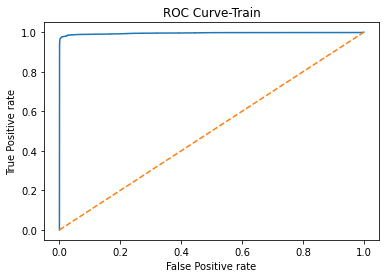

In [116]:
predict_train_weka = []
proba_train_weka = []
for datum in train_weka_smote:
    predict_train_weka.append(smote_c2.classify_instance(datum))
    proba_train_weka.append(smote_c2.distribution_for_instance(datum)[1])
    
train_balan.loc[train_balan['class'] == 'pos','class'] = 1
train_balan.loc[train_balan['class'] == 'neg','class'] = 0
true_label_train = train_balan['class'].astype('int64')

print("Training")
print("")
print("Accuracy:")
print(1-mean_squared_error(train_balan['class'],predict_train_weka))
print("confusion matrix:")
print(confusion_matrix(true_label_train,predict_train_weka))
false_p,true_p,th = metrics.roc_curve(true_label_train,proba_train_weka,pos_label = 1)
auc = metrics.auc(false_p, true_p)
print("AUC:"+str(auc))

plt.title("ROC Curve-Train")
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.plot(false_p,true_p )
plt.plot([0, 1], [0, 1],'--')

plt.show()

Testing

Accuracy:
0.9564375
confusion matrix:
[[15058   567]
 [  130   245]]
AUC:0.7507032746666668


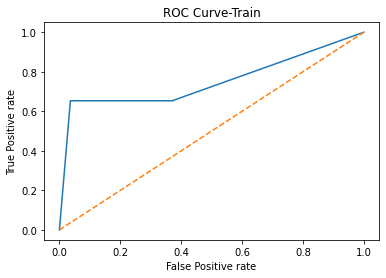

In [117]:
predict_test_weka = []
proba_test_weka = []
for datum in test_weka:
    predict_test_weka.append(smote_c2.classify_instance(datum))
    proba_test_weka.append(smote_c2.distribution_for_instance(datum)[1])
    
new_test2.loc[new_test2['class'] == 'pos','class'] = 1
new_test2.loc[new_test2['class'] == 'neg','class'] = 0
true_label = new_test2['class'].astype('int64')

print("Testing")
print("")
print("Accuracy:")
print(1-mean_squared_error(new_test2['class'],predict_test_weka))
print("confusion matrix:")
print(confusion_matrix(true_label,predict_test_weka))
false_p,true_p,th = metrics.roc_curve(true_label,proba_test_weka,pos_label = 1)
auc = metrics.auc(false_p, true_p)
print("AUC:"+str(auc))

plt.title("ROC Curve-Train")
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.plot(false_p,true_p )
plt.plot([0, 1], [0, 1],'--')

plt.show()

<h2>3.ISLR 6.6.3</h2>

<p>(a) As we increase s from 0, the training RSS will:</p>
<p>Steadily decrease, because when s is large enough, there will be less constraint on the term βj. That leads to a more flexible model which also implies lower training RSS. </p>

<p>(b) Repeat (a) for test RSS</p>
<p>Decrease initially, and then eventually start increasing in a U shape. When the s is not large enough, the test rss will decrease initially, but while the s becomes large enough, the model will start to overfit, and therefore cause the test RSS to increase at the end. 

<p>(c) Repeat (a) for variance.</p>
<p>Steadily increase. The model will be more and more flexible along with a large enough s, and that leads to the increase of variance because of overfitting problem.

<p> (d) Repeat (a) for (squared) bias</p>
<p>Steadily decrease. As we increase s from 0, the model will be more flexible, and that leads to the decrease of bias .</p>

<p>(e) Repeat (a) for the irreducible error.</p>
<p> Remain Constant.The value of irreducible error is not related to the model itself, therefore while increasing s from 0, it'll still remain constant .</p>

<h3>4.ISLR 6.6.5</h3>

![title](hw_552.jpeg)

<h3>5.ISLR 8.4.5</h3>

<p> In this example, what is the final classification under each of these two approaches?</p>
<p> For the majority vote, we should classify X as Red, because there are 6 out of 10 estimate are greater than 0.5.</p>
<p> For the second method, the average probability of the 10 estimates is 0.45, which is less than 0.5. Therefore we should classify X as Green.</p>

<h3>6.ISLR 9.7.3</h3>

<p>(a) We are given n = 7 observations in p = 2 dimensions. For each observation, there is an associated class label.Sketch the observations.</p>


In [124]:
ans_data = [[1,3,4,'red'],
           [2,2,2,'red'],
           [3,4,4,'red'],
           [4,1,4,'red'],
           [5,2,1,'blue'],
           [6,4,3,'blue'],
           [7,4,1,'blue']]
data_ans = pd.DataFrame(ans_data,columns = ['obs.','x1','x2','Y'])
data_ans

,obs.,x1,x2,Y
0,1,3,4,red
1,2,2,2,red
2,3,4,4,red
3,4,1,4,red
4,5,2,1,blue
5,6,4,3,blue
6,7,4,1,blue


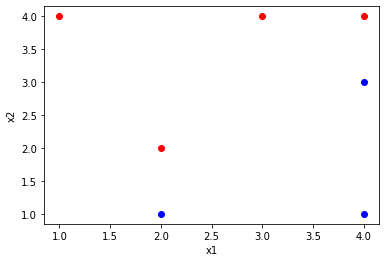

In [174]:
plt.scatter(data_ans[data_ans['Y']=='red']['x1'],data_ans[data_ans['Y']=='red']['x2'],color = 'red')
plt.scatter(data_ans[data_ans['Y']=='blue']['x1'],data_ans[data_ans['Y']=='blue']['x2'],color = 'blue')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

<p>(b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form (9.1)).</p>

<p>Based on the graph, we can see that the separating hyperplane is between point (2,2) and (4,4). Therefore, the line go through point(2,1.5) and (4,3.5), and by ploting these two points, we can get the equation for this hyperplaine: x2 = x1-0.5</p>

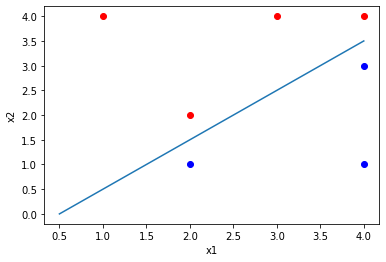

In [193]:
plt.scatter(data_ans[data_ans['Y']=='red']['x1'],data_ans[data_ans['Y']=='red']['x2'],color = 'red')
plt.scatter(data_ans[data_ans['Y']=='blue']['x1'],data_ans[data_ans['Y']=='blue']['x2'],color = 'blue')
plt.plot([0.5,2,4],[0,1.5,3.5])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

<p>(c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if β0 + β1X1 + β2X2 > 0, and classify to Blue otherwise.” Provide the values for β0, β1, and β2.</p>
<p>-0.5 + x1-x2 = 0</p>
<p>β0 == -0.5</p>
<p>β1 == 1</p>
<p>β2 == -1</p>

<p>(d) On your sketch, indicate the margin for the maximal margin hyperplane.</p>

<p> Dashed lines represent the maximal margin hyperplane</p>

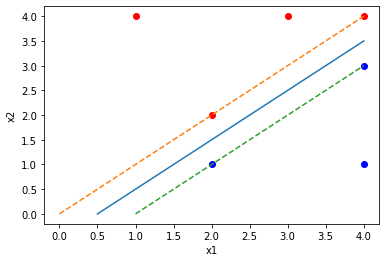

In [181]:
plt.scatter(data_ans[data_ans['Y']=='red']['x1'],data_ans[data_ans['Y']=='red']['x2'],color = 'red')
plt.scatter(data_ans[data_ans['Y']=='blue']['x1'],data_ans[data_ans['Y']=='blue']['x2'],color = 'blue')
plt.plot([0.5,2,4],[0,1.5,3.5])
plt.plot([0,2,4],[0,2,4],linestyle = 'dashed')
plt.plot([1,2,4],[0,1,3],linestyle = 'dashed')
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

<p>(e) Indicate the support vectors for the maximal margin classifier.</p>
<p>The support vectors are (2,2),(4,4), (2,1) and (4,3).

<p>(f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.</p>
<p> As long as the seventh observation (4,1) is still under the margin between (2,2) and (4,4), it will not affect the maximal margin hyperplane. (4,1) is very far from the margin, therefore a slight movement will make no effect.</p>

<p>(g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.</p>
<p>The red line is not the optimal separating hyperplane</p>
<p>x2 = x1 - 0.75</p>
<p>β0 == -0.75</p>
<p>β1 == 1</p>
<p>β2 == -1</p>

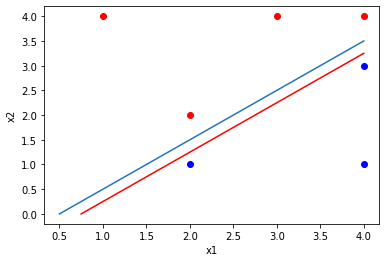

In [189]:
plt.scatter(data_ans[data_ans['Y']=='red']['x1'],data_ans[data_ans['Y']=='red']['x2'],color = 'red')
plt.scatter(data_ans[data_ans['Y']=='blue']['x1'],data_ans[data_ans['Y']=='blue']['x2'],color = 'blue')
plt.plot([0.5,2,4],[0,1.5,3.5])
plt.plot([0.75,2,4],[0,1.25,3.25], color = 'red' )
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

<p>(h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.</p>

<p>Additional Point: (2,4)</p>

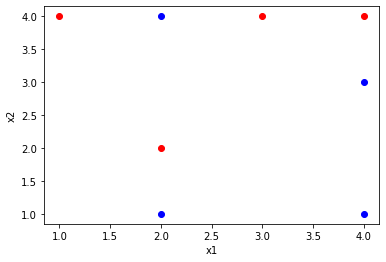

In [192]:
plt.scatter(data_ans[data_ans['Y']=='red']['x1'],data_ans[data_ans['Y']=='red']['x2'],color = 'red')
plt.scatter(data_ans[data_ans['Y']=='blue']['x1'],data_ans[data_ans['Y']=='blue']['x2'],color = 'blue')
plt.scatter([2],[4],color = 'blue')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [ ]:
jvm.stop()